In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress
import requests
import time
from datetime import datetime

# Import API key
from config import weather_api_key

#  Import and read the charity_data.csv.
df = pd.read_csv("Pollution")
df

,city,date,aqi,so2,no2,pm10,pm2.5,o3,co
0,Tokyo,1641013200,1,0.15,0.04,10.28,2.83,27.54,240.33
1,Tokyo,1641016800,1,0.15,0.04,10.63,2.88,27.89,236.99
2,Tokyo,1641020400,1,0.14,0.04,10.31,2.92,27.89,230.31
3,Tokyo,1641024000,1,0.14,0.03,9.62,2.93,28.25,230.31
4,Tokyo,1641027600,1,0.14,0.02,9.13,2.92,28.25,230.31
...,...,...,...,...,...,...,...,...,...
858695,Dalian,1672513200,1,0.04,0.06,1.98,1.29,19.49,283.72
858696,Dalian,1672516800,1,0.04,0.07,2.12,1.35,19.49,283.72
858697,Dalian,1672520400,1,0.05,0.08,2.17,1.38,19.49,283.72
858698,Dalian,1672524000,1,0.05,0.08,2.13,1.37,19.31,283.72


In [2]:
# Check data types
df.dtypes

city      object
date       int64
aqi        int64
so2      float64
no2      float64
pm10     float64
pm2.5    float64
o3       float64
co       float64
dtype: object

In [3]:
# Check for missing values
df.count()

city     858700
date     858700
aqi      858700
so2      858700
no2      858700
pm10     858700
pm2.5    858700
o3       858700
co       858700
dtype: int64

In [4]:
# Check "aqi" (air quality) values unique values
df['aqi'].unique()

array([1, 2, 3, 4], dtype=int64)

(array([794000.,      0.,      0.,  61200.,      0.,      0.,   2600.,
             0.,      0.,    900.]),
 array([1. , 1.3, 1.6, 1.9, 2.2, 2.5, 2.8, 3.1, 3.4, 3.7, 4. ]),
 <BarContainer object of 10 artists>)

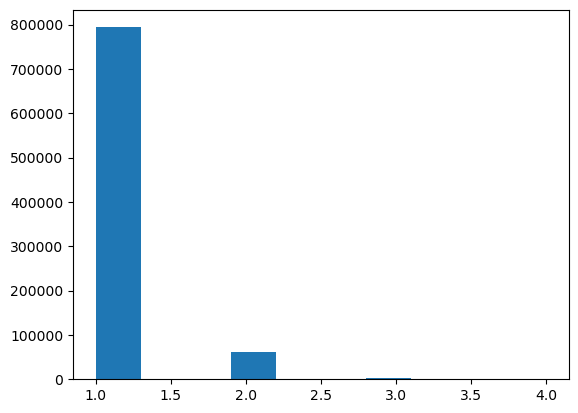

In [5]:
# Check distribution of "aqi"
plt.hist(df.aqi)

In [6]:
# Change data type for "aqi"
df['aqi'] = df['aqi'].astype('object')

In [7]:
# Change "aqi" value names
df['aqi'] = df['aqi'].replace([1], 'one')

In [8]:
# Change "aqi" value names
df['aqi'] = df['aqi'].replace([2], 'two')

In [9]:
# Change "aqi" value names
df['aqi'] = df['aqi'].replace([3], 'three') 

In [10]:
# Change "aqi" value names
df['aqi'] = df['aqi'].replace([4], 'four')

In [11]:
df['aqi'].unique()

array(['one', 'two', 'three', 'four'], dtype=object)

In [12]:
# Check data type changes
df.dtypes

city      object
date       int64
aqi       object
so2      float64
no2      float64
pm10     float64
pm2.5    float64
o3       float64
co       float64
dtype: object

In [13]:
# Create features
X = pd.get_dummies(df.drop(columns=['aqi']))


# Create our target
y = pd.DataFrame(df['aqi'])

In [14]:
X.describe()

,date,so2,no2,pm10,pm2.5,o3,co,city_Abidjan,city_Addis Abeba,city_Ahmadabad,...,city_Surat,city_Sydney,city_Taipei,city_Taiyuan,city_Tangshan,city_Tianjin,city_Tokyo,city_Toronto,city_Wuhan,city_Xian
count,8.587000e+05,858700.000000,858700.000000,858700.000000,858700.000000,858700.000000,858700.00000,858700.000000,858700.000000,858700.000000,...,858700.000000,858700.000000,858700.000000,858700.000000,858700.000000,858700.000000,858700.000000,858700.000000,858700.000000,858700.000000
mean,1.656712e+09,0.129024,0.045475,8.562924,3.590365,37.280363,295.54324,0.010000,0.010000,0.010000,...,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000
std,9.042442e+06,0.081527,0.019688,5.997642,2.821321,18.314992,44.32683,0.099499,0.099499,0.099499,...,0.099499,0.099499,0.099499,0.099499,0.099499,0.099499,0.099499,0.099499,0.099499,0.099499
min,1.641013e+09,0.020000,0.010000,0.550000,0.500000,9.570000,198.60000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.648912e+09,0.060000,0.030000,3.950000,1.930000,22.710000,260.35000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.656641e+09,0.110000,0.040000,7.420000,2.950000,31.470000,287.06000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.664543e+09,0.190000,0.050000,11.790000,4.340000,51.500000,323.77000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.672528e+09,0.480000,0.240000,48.890000,33.310000,121.590000,473.98000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [15]:
# Check the balance of our target values
y['aqi'].value_counts()

one      794000
two       61200
three      2600
four        900
Name: aqi, dtype: int64

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1 , stratify = y)
y_train.shape

(644025, 1)

In [17]:
# Train the Logistic Regression model using the resampled data
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='lbfgs', random_state=1)
model.fit(X, y)

C:\Users\chris\anaconda3\envs\mlenv\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(random_state=1)

In [18]:
# Calculated the balanced accuracy score
from sklearn.metrics import balanced_accuracy_score

balanced_accuracy_score(y_test, model.predict(X_test))

0.25

In [19]:
# Display the confusion matrix
from sklearn.metrics import confusion_matrix

y_pred = model.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[     0,    225,      0,      0],
       [     0, 198500,      0,      0],
       [     0,    650,      0,      0],
       [     0,  15300,      0,      0]], dtype=int64)

In [20]:
# Print the imbalanced classification report
from imblearn.metrics import classification_report_imbalanced

print(classification_report_imbalanced(y_test, y_pred))

C:\Users\chris\anaconda3\envs\mlenv\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                   pre       rec       spe        f1       geo       iba       sup

       four       0.00      0.00      1.00      0.00      0.00      0.00       225
        one       0.92      1.00      0.00      0.96      0.00      0.00    198500
      three       0.00      0.00      1.00      0.00      0.00      0.00       650
        two       0.00      0.00      1.00      0.00      0.00      0.00     15300

avg / total       0.85      0.92      0.08      0.89      0.00      0.00    214675

